In [26]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

EPSILON = 0.005

import coco
import yolo
import vgg
import annotation_helper as ah

repo_dir = project_name = 'COTSDataset' 
part1_single_objects = os.path.join(repo_dir, "Part 1 - Single Objects")
part2_multiple_objects = os.path.join(repo_dir, "Part 2 - Multiple Objects")
part3_complex_background = os.path.join(repo_dir, "Part 3 - Complex Background")


do_display = True
do_save = True

# COCO
coco_output_dir = "../Annotations/COCO_annotations"
coco_color = (255, 0, 255)

# YOLO
yolo_output_dir = "../Annotations/YOLO_annotations"
yolo_color = (0, 255, 0)

# VGG
vgg_output_dir = "../Annotations/VGG_annotations"
vgg_color = (255, 0, 0)

In [2]:
gt = cv2.imread('COTSDataset/Part 2 - Multiple Objects/souvenirs_no/masks/souvenirs_no_3_colour_mask_1_mask.png')
# original_mask = cv2.cvtColor(original_mask, cv2.COLOR_BGR2GRAY)

In [3]:
base = gt.copy()

In [4]:
image = cv2.imread('COTSDataset/Part 2 - Multiple Objects/souvenirs_no/1_colour.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

**PA**

In [88]:
def pa(name, gt, colour):
    pa_im = (0, name, gt, 'Table', 'souvenir', './')

    pa_annotation = coco.annotate(pa_im,
                        do_display=False, do_save=False, annotation_color=ah.multiple_object_annotation_color(colour), epsilon=0,configuration=coco.POLY_APPROX, object_configuration=coco.MULTIPLE_OBJ, do_cvt=True)

    base = gt.copy()

    for label, contours in pa_annotation['contours'].items():
        annotation_color = ah.multiple_object_annotation_color(
                annotation_color=colour)

        for contour in contours:
            base = cv2.drawContours(base.copy(), [contour], -1, annotation_color, 5, cv2.LINE_AA)

    pa_mask = base.copy()
    # pa_mask_on_image = cv2.drawContours(image.copy(), pa_annotation['contours'], -1, (255, 0, 255), 5, cv2.LINE_AA)
    # pa_mask_on_image_filled = cv2.drawContours(pa_mask_on_image.copy(), pa_annotation['contours'], -1, (255, 0, 255, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
    # pa_mask_on_image_final = cv2.addWeighted(image.copy(), 0.6, pa_mask_on_image_filled, 0.4, 0)
    # pa_mask_on_image_final = cv2.drawContours(pa_mask_on_image_final.copy(), pa_annotation['contours'], -1, (255, 0, 255), 5, cv2.LINE_AA)
    # pa_mask_bbox = cv2.boundingRect(pa_annotation['contours'][0])

    return pa_mask

In [6]:
pa_im = (0, 'souvenirs_no_3_colour_mask_1_mask.png', gt, 'Table', 'souvenir', './')
pa_annotation = coco.annotate(pa_im,
                      do_display=False, do_save=False, annotation_color=(255, 0, 0), epsilon=0.005,configuration=coco.POLY_APPROX, object_configuration=coco.SINGLE_OBJ, do_cvt=True)


 Annotating image:  souvenirs_no_3_colour_mask_1_mask.png
------------------------------------------------------------------------------------------------------------------------


In [7]:
pa_mask = cv2.drawContours(base.copy(), pa_annotation['contours'], -1, (255, 0, 255), 5, cv2.LINE_AA)
pa_mask_on_image = cv2.drawContours(image.copy(), pa_annotation['contours'], -1, (255, 0, 255), 5, cv2.LINE_AA)
pa_mask_on_image_filled = cv2.drawContours(pa_mask_on_image.copy(), pa_annotation['contours'], -1, (255, 0, 255, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
pa_mask_on_image_final = cv2.addWeighted(image.copy(), 0.6, pa_mask_on_image_filled, 0.4, 0)
pa_mask_on_image_final = cv2.drawContours(pa_mask_on_image_final.copy(), pa_annotation['contours'], -1, (255, 0, 255), 5, cv2.LINE_AA)
pa_mask_bbox = cv2.boundingRect(pa_annotation['contours'][0])




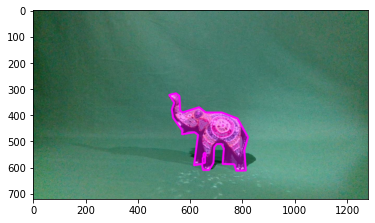

In [8]:
plt.imshow(pa_mask_on_image_final)

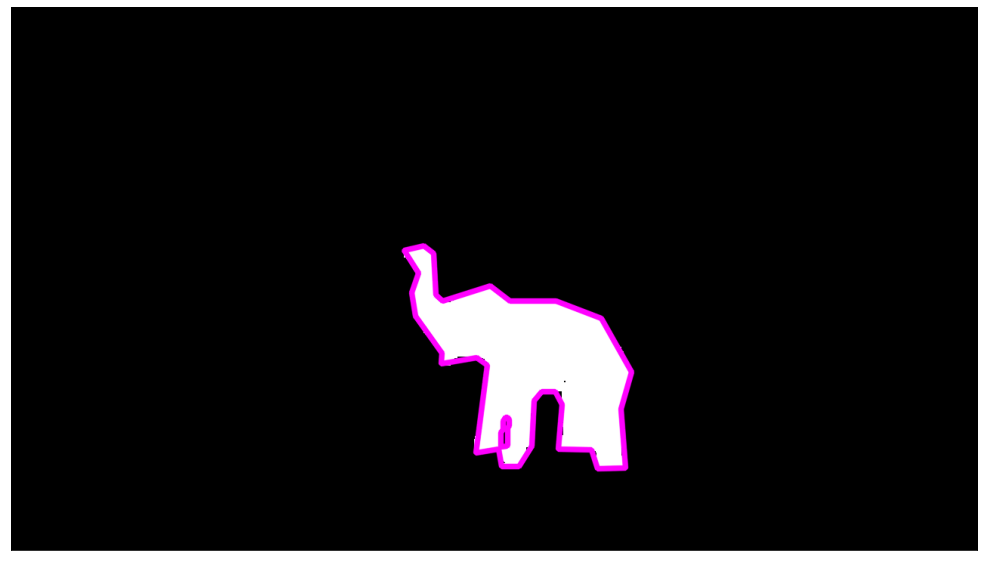

In [9]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.imshow(pa_mask)
plt.xticks([])
plt.yticks([])
plt.show()

**KMC**

In [41]:
def kmc(name, gt, colour):
    kmc_im = (0, name, gt, 'Table', 'souvenir', './')
    kmc_annotation = coco.annotate(kmc_im,
                        do_display=False, do_save=False, annotation_color=ah.multiple_object_annotation_color(colour), epsilon=0.005, configuration=coco.K_MEANS_CLUSTER, object_configuration=coco.MULTIPLE_OBJ, do_cvt=True)

    base = gt.copy()

    for label, contours in kmc_annotation['contours'].items():
        annotation_color = ah.multiple_object_annotation_color(
                annotation_color=colour)

        for contour in contours:
            base = cv2.drawContours(base.copy(), [contour], -1, annotation_color, 5, cv2.LINE_AA)

    kmc_mask = base.copy()
    # kmc_mask_on_image = cv2.drawContours(image.copy(), kmc_annotation['contours'], -1, (255, 0, 255), 5, cv2.LINE_AA)
    # kmc_mask_on_image_filled = cv2.drawContours(kmc_mask_on_image.copy(), kmc_annotation['contours'], -1, (255, 0, 255, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
    # kmc_mask_on_image_final = cv2.addWeighted(image.copy(), 0.6, kmc_mask_on_image_filled, 0.4, 0)
    # kmc_mask_on_image_final = cv2.drawContours(kmc_mask_on_image_final.copy(), kmc_annotation['contours'], -1, (255, 0, 255), 5, cv2.LINE_AA)
    # kmc_mask_bbox = cv2.boundingRect(kmc_annotation['contours'][0])

    return kmc_mask

In [11]:
kmc_im = (0, 'souvenirs_no_3_colour_mask_1_mask.png', gt, 'Table', 'souvenir', './')
kmc_annotation = coco.annotate(kmc_im,
                      do_display=False, do_save=False, annotation_color=(255, 0, 0), epsilon=0.005, configuration=coco.K_MEANS_CLUSTER, object_configuration=coco.SINGLE_OBJ, do_cvt=True)


 Annotating image:  souvenirs_no_3_colour_mask_1_mask.png
------------------------------------------------------------------------------------------------------------------------


In [12]:
kmc_mask = cv2.drawContours(base.copy(), kmc_annotation['contours'], -1, (255, 128, 0), 7, cv2.LINE_AA)
kmc_mask_on_image = cv2.drawContours(image.copy(), kmc_annotation['contours'], -1, (255, 128, 0), 5, cv2.LINE_AA)
kmc_mask_on_image_filled = cv2.drawContours(kmc_mask_on_image.copy(), kmc_annotation['contours'], -1, (255, 128, 0, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
kmc_mask_on_image_final = cv2.addWeighted(image.copy(), 0.6, kmc_mask_on_image_filled, 0.4, 0)
kmc_mask_on_image_final = cv2.drawContours(kmc_mask_on_image_final.copy(), kmc_annotation['contours'], -1, (255, 128, 0), 5, cv2.LINE_AA)

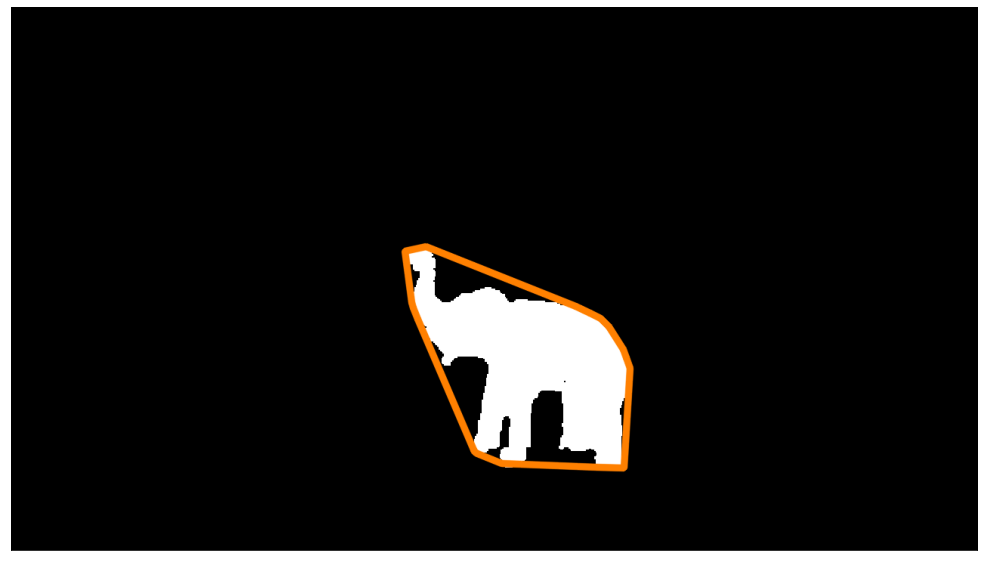

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.imshow(kmc_mask)
plt.xticks([])
plt.yticks([])
plt.show()

**SAM**

In [84]:
def sam(name, gt, sam_mask, colour):
    sam_im = (0, name, sam_mask, 'Table', 'souvenir', './')

    sam_annotation = coco.annotate(sam_im,
                        do_display=False, do_save=False, annotation_color=ah.multiple_object_annotation_color(colour), epsilon=0.005,configuration=coco.POLY_APPROX, object_configuration=coco.MULTIPLE_OBJ, do_cvt=True)

    base = gt.copy()

    for label, contours in sam_annotation['contours'].items():
        annotation_color = ah.multiple_object_annotation_color(
                annotation_color=colour)

        for contour in contours:
            base = cv2.drawContours(base.copy(), [contour], -1, annotation_color, 5, cv2.LINE_AA)

    sam_mask = base.copy()
    # sam_mask_on_image = cv2.drawContours(image.copy(), sam_contours, -1, (0, 0, 255), 7, cv2.LINE_AA)
    # sam_mask_on_image_filled = cv2.drawContours(sam_mask_on_image.copy(), sam_contours, -1, (0, 0, 255, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
    # sam_mask_on_image_final = cv2.addWeighted(image.copy(), 0.6, sam_mask_on_image_filled, 0.4, 0)
    # sam_mask_on_image_final = cv2.drawContours(sam_mask_on_image_final.copy(), sam_contours, -1, (0, 0, 255), 7, cv2.LINE_AA)

    return sam_mask

In [15]:
gt = cv2.imread('./COTSDataset/Part 2 - Multiple Objects/souvenirs_no/masks/souvenirs_no_3_colour_mask_1_mask.png')
sam_mask = cv2.imread('./Evaluation/segment-anything/souvenirs_no_3_colour_mask_1_mask.png')
sam_mask = cv2.cvtColor(sam_mask, cv2.COLOR_BGR2GRAY)

In [16]:
plt.imshow(sam('test', gt, sam_mask, (0, 0, 255)))

error: OpenCV(4.6.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xf2302844::Set<1,-1,-1>,struct cv::impl::A0xf2302844::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
sam_original_mask = cv2.imread('./Figures/table/souvenirs_no_3_colour_mask_1_mask.png')
sam_original_mask = cv2.cvtColor(sam_original_mask, cv2.COLOR_BGR2GRAY)
sam_contours = cv2.findContours(sam_original_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

In [ ]:
sam_mask = cv2.drawContours(base.copy(), sam_contours, -1, (0, 0, 255), 7, cv2.LINE_AA)
sam_mask_on_image = cv2.drawContours(image.copy(), sam_contours, -1, (0, 0, 255), 7, cv2.LINE_AA)
sam_mask_on_image_filled = cv2.drawContours(sam_mask_on_image.copy(), sam_contours, -1, (0, 0, 255, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
sam_mask_on_image_final = cv2.addWeighted(image.copy(), 0.6, sam_mask_on_image_filled, 0.4, 0)
sam_mask_on_image_final = cv2.drawContours(sam_mask_on_image_final.copy(), sam_contours, -1, (0, 0, 255), 7, cv2.LINE_AA)

**B_BOX**

In [91]:
def bbox(contours, gt):
    bbox_im = (0, 'test', gt, 'Table', 'souvenir', './')
    bbox_annotation = yolo.annotate(bbox_im,
                        do_display=False, do_save=False, annotation_color=ah.multiple_object_annotation_color((0, 255, 0)), object_configuration=yolo.MULTIPLE_OBJ, do_cvt=True)

    blank_image = np.zeros((gt.shape[0], gt.shape[1], 3), np.uint8)
    image_with_bounding_box = gt.copy()
    alpha = 0

    for contour in bbox_annotation['contours']:
        annotation_color = ah.multiple_object_annotation_color(
            annotation_color=(0, 255, 0))

        x, y, w, h = contour

        filled_image = cv2.rectangle(blank_image, (x, y),

                                        (x+w, y+h), annotation_color, cv2.FILLED)
        # adding the filled bounding box to the image with bounding boxes
        image_with_bounding_box = cv2.addWeighted(image_with_bounding_box,
                                                    1-alpha, filled_image, alpha, 0)

        # drawing the bounding box on the image with bounding boxes
        image_with_bounding_box = cv2.rectangle(image_with_bounding_box, (x, y),
                                                (x+w, y+h), annotation_color, 7)

    return image_with_bounding_box


    # contours = cv2.findContours(cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    # bbox = cv2.boundingRect(contours[0])
    # gt_bbox = cv2.rectangle(gt.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 5, cv2.LINE_AA)
    
    
    
    # image_bbox = cv2.rectangle(image.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 5, cv2.LINE_AA)
    # image_bbox_filled = cv2.rectangle(image_bbox.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
    # image_bbox_final = cv2.addWeighted(image.copy(), 0.8, image_bbox_filled, 0.2, 0)
    # image_bbox_final = cv2.rectangle(image_bbox_final.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 5, cv2.LINE_AA)

    return gt_bbox

In [ ]:
contours = cv2.findContours(cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
bbox = cv2.boundingRect(contours[0])
gt_bbox = cv2.rectangle(gt.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 5, cv2.LINE_AA)
image_bbox = cv2.rectangle(image.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 5, cv2.LINE_AA)
image_bbox_filled = cv2.rectangle(image_bbox.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
image_bbox_final = cv2.addWeighted(image.copy(), 0.8, image_bbox_filled, 0.2, 0)
image_bbox_final = cv2.rectangle(image_bbox_final.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 5, cv2.LINE_AA)

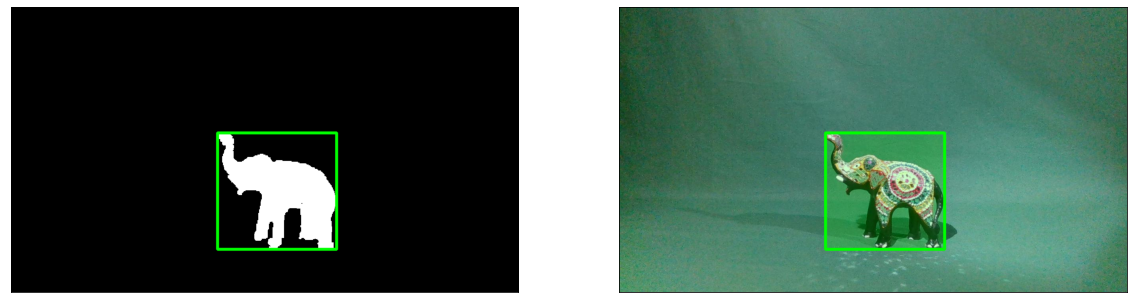

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.subplot(121)
plt.imshow(gt_bbox)
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(image_bbox_final)
plt.xticks([])
plt.yticks([])
plt.show()

**Plot**

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.imshow(sam_mask)
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'sam_mask' is not defined

<Figure size 1440x720 with 0 Axes>

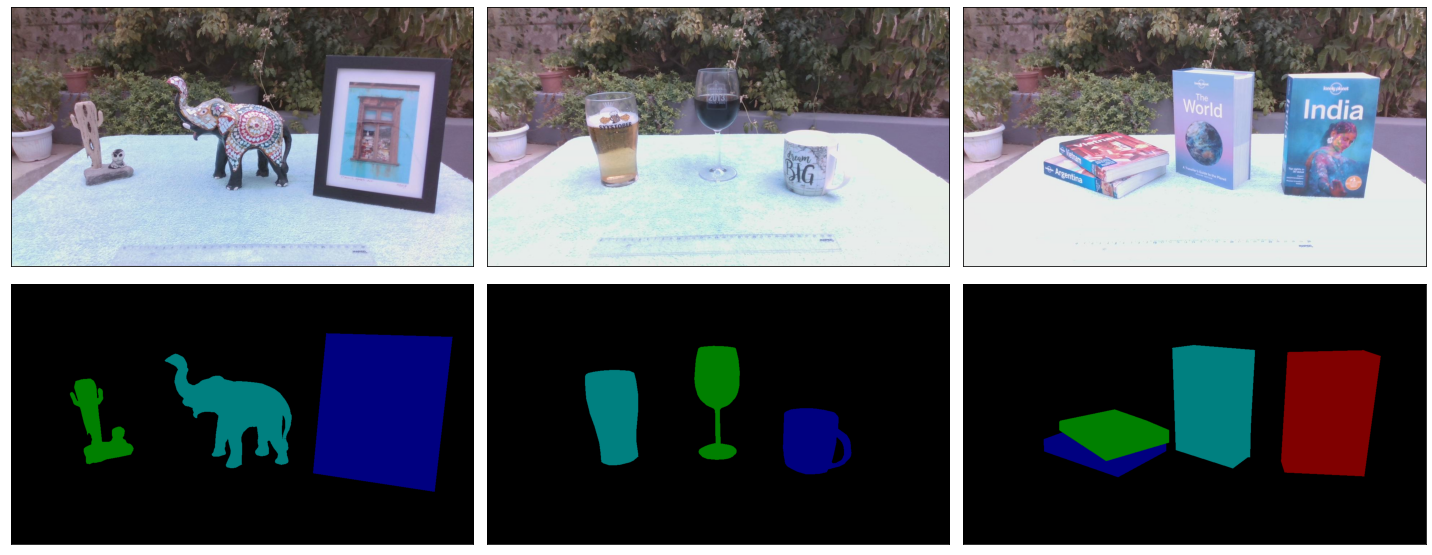

In [67]:
plt.rcParams["figure.figsize"] = (20, 8)
fig, ax = plt.subplots(2, 3)

original_paths = [
    'COTSDataset/Part 3 - Complex Background/souvenirsA_nw_no/3_colour.jpeg',
    'COTSDataset/Part 3 - Complex Background/cupsA_nw_no/3_colour.jpeg',
    'COTSDataset/Part 3 - Complex Background/booksA_nw_no/1_colour.jpeg'
]

paths = [
    'COTSDataset/Part 3 - Complex Background/masks/souvenirsa_nw_no/3_colour.png',
    'COTSDataset/Part 3 - Complex Background/masks/cupsa_nw_no/3_colour.png',
    'COTSDataset/Part 3 - Complex Background/masks/booksa_nw_no/1_colour.png'
]

originals = []
images = []

for path in original_paths:
    originals.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))

for path in paths:
    images.append(cv2.imread(path))

for i, original in enumerate(originals):
    ax[0][i].imshow(original)
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])

for i, image in enumerate(images):
    ax[1][i].imshow(image)
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])

# col_labels = ['Original Image', 'Image Mask']
# for i, col_label in enumerate(col_labels):
#     ax[i].set_title(col_label, size=25, pad=20)

fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

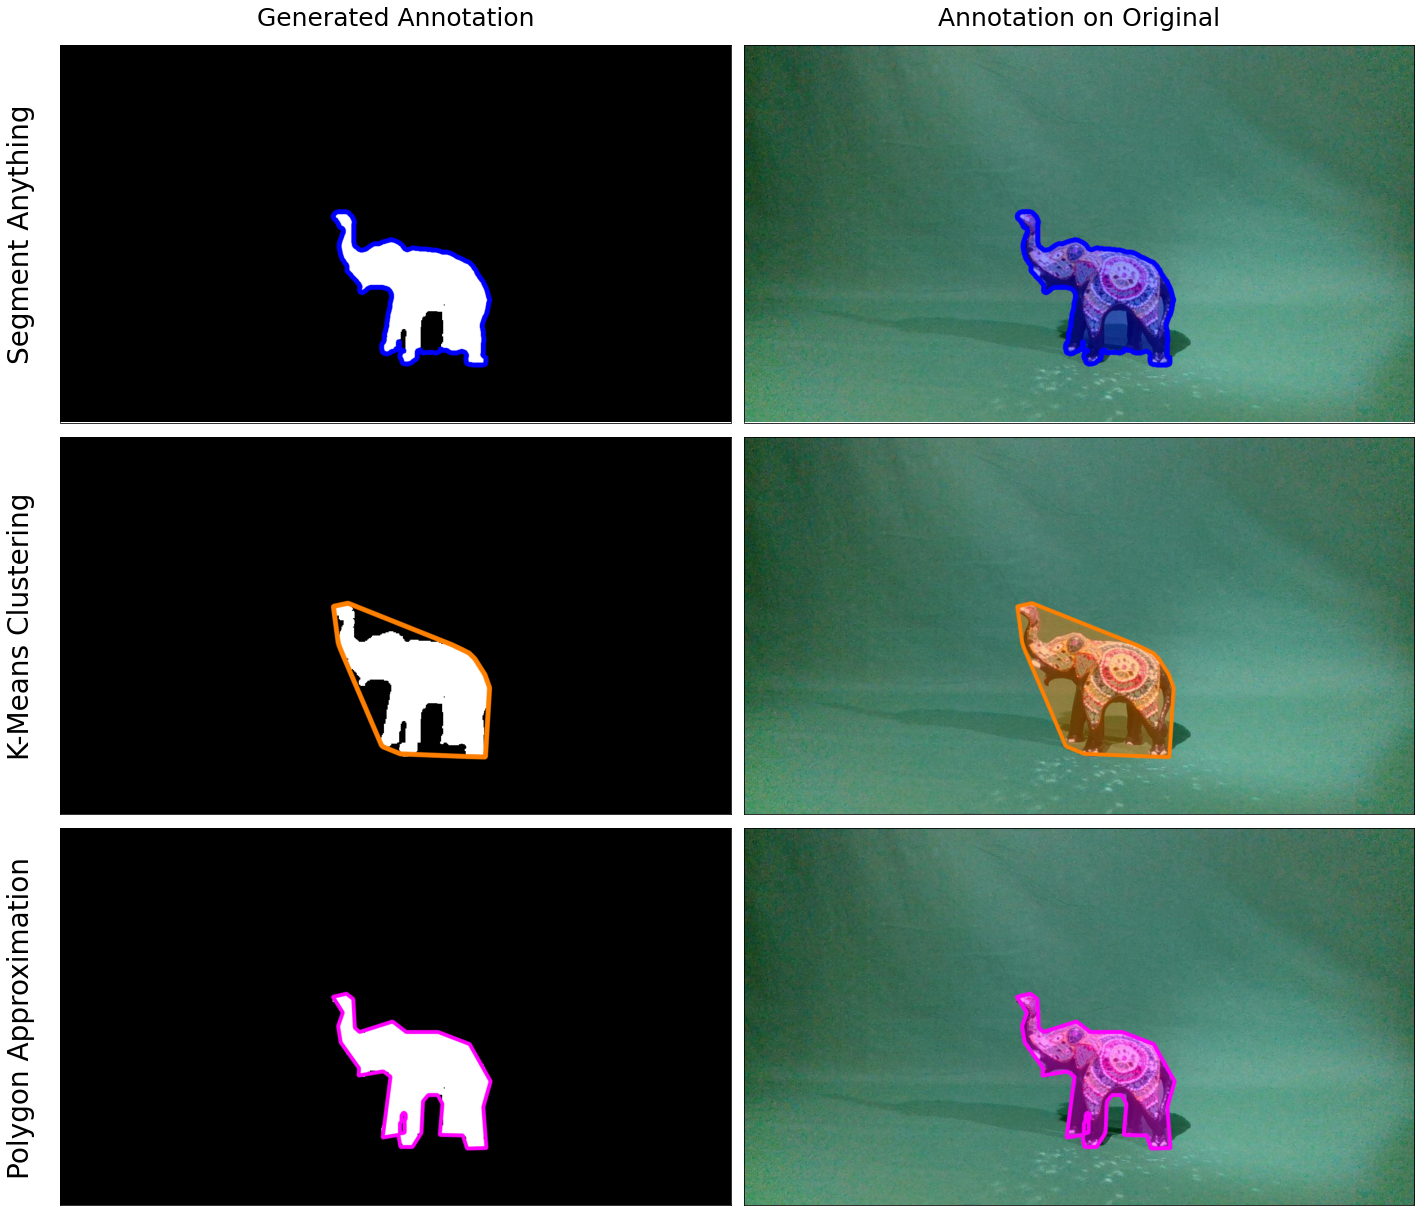

In [ ]:
plt.rcParams["figure.figsize"] = (20, 17)
fig, ax = plt.subplots(3, 2)

ax[0, 0].imshow(sam_mask)
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])

ax[0, 1].imshow(sam_mask_on_image_final)
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])

ax[1, 0].imshow(kmc_mask)
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])

ax[1, 1].imshow(kmc_mask_on_image_final)
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])

ax[2, 0].imshow(pa_mask)
ax[2, 0].set_xticks([])
ax[2, 0].set_yticks([])

ax[2, 1].imshow(pa_mask_on_image_final)
ax[2, 1].set_xticks([])
ax[2, 1].set_yticks([])



row_labels = ['Segment Anything', 'K-Means Clustering', 'Polygon Approximation']
for i, row_label in enumerate(row_labels):
    ax[i, 0].set_ylabel(row_label, rotation=90, size=28, labelpad=25,)

col_labels = ['Generated Annotation', 'Annotation on Original']
for j, col_label in enumerate(col_labels):
    ax[0, j].set_title(col_label, size=25, pad=20)


fig.patch.set_facecolor('white')

            

plt.tight_layout()
plt.show()

NameError: name 'gt_bbox' is not defined

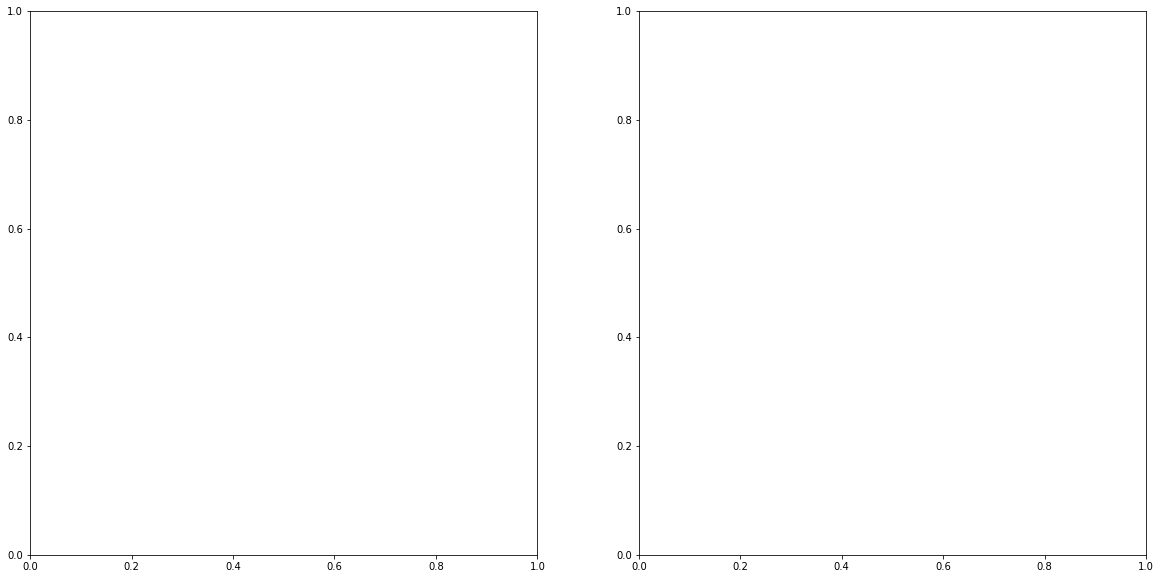

In [63]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1, 2)

ax[0].imshow(gt_bbox)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(image_bbox_final)
ax[1].set_xticks([])
ax[1].set_yticks([])

col_labels = ['Generated Annotation', 'Annotation on Original']
for i, col_label in enumerate(col_labels):
    ax[i].set_title(col_label, size=25, pad=20)

fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

**Plot 2**

In [89]:
paths = [
    'COTSDataset/Part 3 - Complex Background/masks/souvenirsa_nw_no/3_colour.png',
    'COTSDataset/Part 3 - Complex Background/masks/cupsa_nw_no/3_colour.png',
    'COTSDataset/Part 3 - Complex Background/masks/booksa_nw_no/1_colour.png'
]

sam_paths = [
    'Evaluation/segment-anything/multiple/souvenirsa_nw_no_3_colour.png',
    'Evaluation/segment-anything/multiple/cupsa_nw_no_3_colour.png',
    'Evaluation/segment-anything/multiple/booksa_nw_no_1_colour.png'
]

pa_masks = []
kmc_masks = []
sam_masks = []


for i, path in enumerate(paths):
    print(path)
    mask = cv2.imread(path)

    sam_mask = sam_paths[i]
    sam_mask = cv2.imread(sam_mask)
    # sam_mask = cv2.cvtColor(sam_mask, cv2.COLOR_BGR2GRAY)

    name = path.split('/')[-1].split('.')[0]

    pa_masks.append(pa(name, mask, (255, 0, 255)))
    kmc_masks.append(kmc(name, mask, (255, 128, 0)))
    sam_masks.append(sam(name, mask, sam_mask, (0, 0, 255)))

COTSDataset/Part 3 - Complex Background/masks/souvenirsa_nw_no/3_colour.png

 Annotating image:  3_colour
 
 Number of objects detected:  3 
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  3_colour
 
 Number of objects detected:  3 
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  3_colour
 
 Number of objects detected:  4 
------------------------------------------------------------------------------------------------------------------------
COTSDataset/Part 3 - Complex Background/masks/cupsa_nw_no/3_colour.png

 Annotating image:  3_colour
 
 Number of objects detected:  3 
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  3_colour
 
 Number of objects detected:  3 
--------------------------------------------

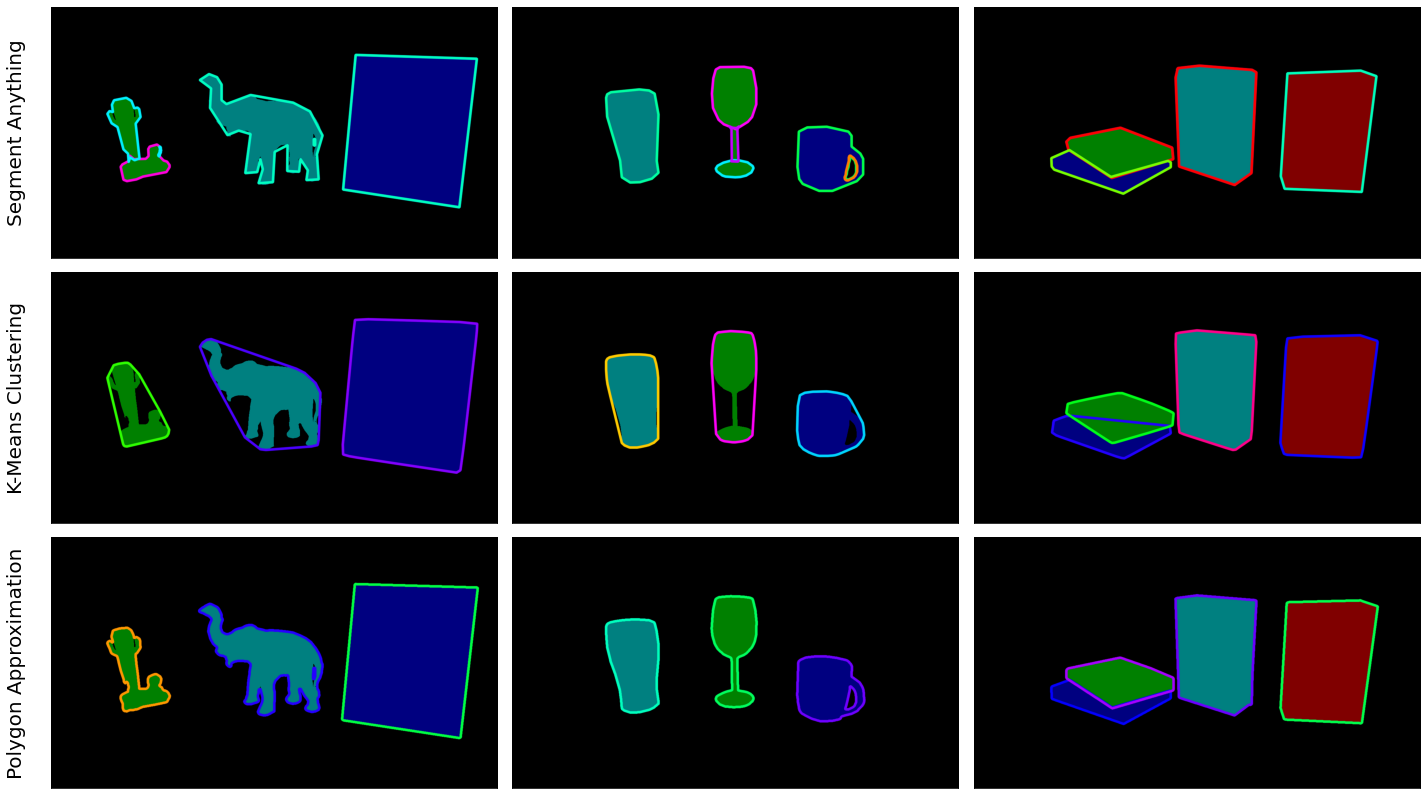

In [90]:
plt.rcParams["figure.figsize"] = (20, 11.2)
fig, ax = plt.subplots(3, 3)

for i, mask in enumerate(sam_masks):
    ax[0, i].imshow(mask)
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])

for i, mask in enumerate(kmc_masks):
    ax[1, i].imshow(mask)
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])

for i, mask in enumerate(pa_masks):
    ax[2, i].imshow(mask)
    ax[2, i].set_xticks([])
    ax[2, i].set_yticks([])

row_labels = ['Segment Anything', 'K-Means Clustering', 'Polygon Approximation']
for i, row_label in enumerate(row_labels):
    ax[i, 0].set_ylabel(row_label, rotation=90, size=20, labelpad=25,)

# col_labels = ['Generated Annotation', 'Annotation on Original']
# for j, col_label in enumerate(col_labels):
#     ax[0, j].set_title(col_label, size=25, pad=20)

# fig.suptitle('Generated Annotations', fontsize=30)

fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

In [92]:
paths = [
    'COTSDataset/Part 3 - Complex Background/masks/souvenirsa_nw_no/3_colour.png',
    'COTSDataset/Part 3 - Complex Background/masks/cupsa_nw_no/3_colour.png',
    'COTSDataset/Part 3 - Complex Background/masks/booksa_nw_no/1_colour.png'
]
bboxs = []


for i, path in enumerate(paths):
    print(path)
    mask = cv2.imread(path)

    sam_mask = sam_paths[i]
    sam_mask = cv2.imread(sam_mask)
    # sam_mask = cv2.cvtColor(sam_mask, cv2.COLOR_BGR2GRAY)

    name = path.split('/')[-1].split('.')[0]

    bboxs.append(bbox(name, mask))

COTSDataset/Part 3 - Complex Background/masks/souvenirsa_nw_no/3_colour.png

 Annotating image:  test
 
 Number of objects detected:  3 
------------------------------------------------------------------------------------------------------------------------
COTSDataset/Part 3 - Complex Background/masks/cupsa_nw_no/3_colour.png

 Annotating image:  test
 
 Number of objects detected:  3 
------------------------------------------------------------------------------------------------------------------------
COTSDataset/Part 3 - Complex Background/masks/booksa_nw_no/1_colour.png

 Annotating image:  test
 
 Number of objects detected:  4 
------------------------------------------------------------------------------------------------------------------------


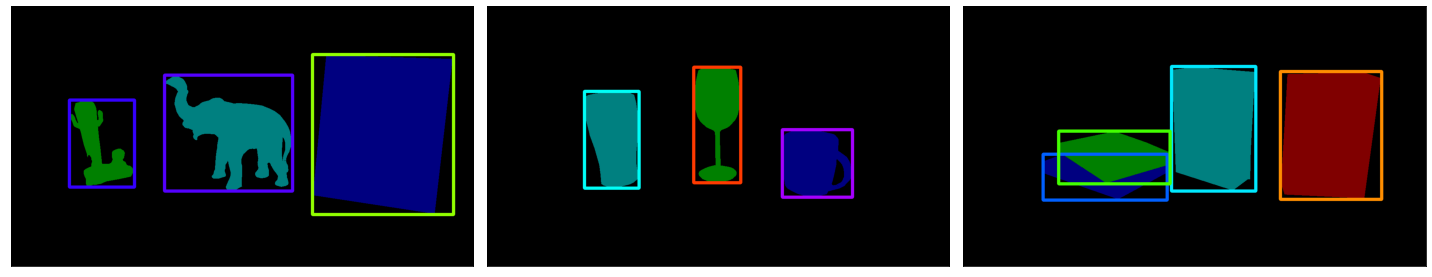

In [93]:
plt.rcParams["figure.figsize"] = (20, 11.2)
fig, ax = plt.subplots(1, 3)

for i, mask in enumerate(bboxs):
    ax[i].imshow(mask)
    ax[i].set_xticks([])
    ax[i].set_yticks([])


# col_labels = ['Generated Annotation', 'Annotation on Original']
# for j, col_label in enumerate(col_labels):
#     ax[0, j].set_title(col_label, size=25, pad=20)

# fig.suptitle('Generated Annotations', fontsize=30)

fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

In [ ]:
bboxs[2] = bbox(name, mask)

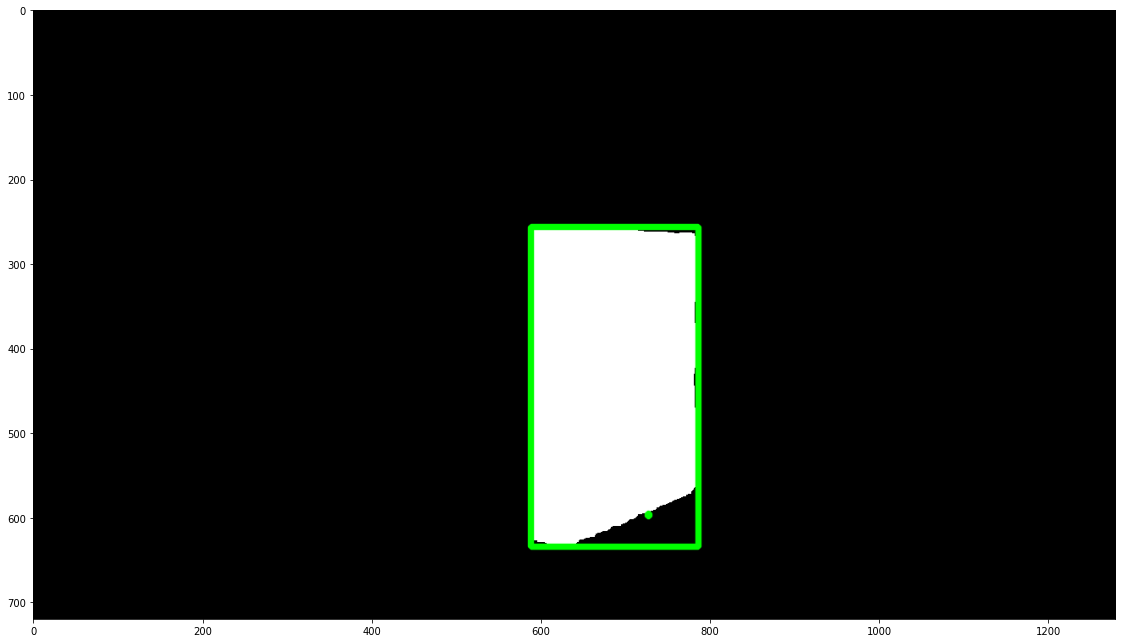

In [ ]:
plt.imshow(bbox(name, mask))